####Welcome to your first image classification problem! In this lab, you will be importing images from the MNIST dataset as our training dataset. We will be using deep neural network to classify the images into 9 classes: Numbers from 0-9. Since we have more than two classes, this problem falls under **multi-class classification** problem.

For the homework assignment, we will do a binary classification problem to classify cats and dogs. Then, we will be moving on to a regression problem to predict values.

####Let's import the images.####

In [34]:
#Import the images from keras datasets itself
from keras.datasets import mnist
import numpy as np

#Assign the datasets to training and test images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Training Data**
Training data is the data you use to train an algorithm or machine learning model to predict the outcome you design your model to predict.

**Test Data**
A subset of the available to test the trained Machine Learning model.

**Labels**
In Machine Learning, a category in a classification problem is called a class. These classes are also called labels and which are basically saying that the image of the digit **1** is **1** but in a way that computers understand.

We won't be focusing on the specific code but rather get a general feel of what a classification problem looks like.

Next, let's see how many images we have and what an image looks like.

In [35]:
#Shape of the training images
print("The shape of the training images is: " + str(train_images.shape))
print("The dimension of the images is: ", train_images.ndim, "\n")

#Similar with the test images
print("The shape of the test images is: ", test_images.shape)

The shape of the training images is: (60000, 28, 28)
The dimension of the images is:  3 

The shape of the test images is:  (10000, 28, 28)


Dimension of 3 means, it has 60000 images in which each image has a pixel size of **28x28** pixels.

Let's see how some of the images look like.

This image is in class '9'.


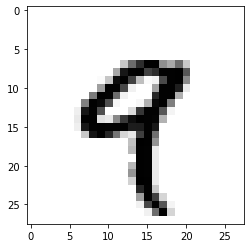

This image is in class '1'.


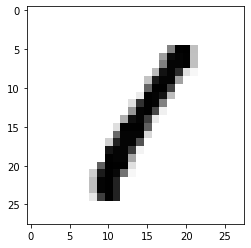

This image is in class '7'.


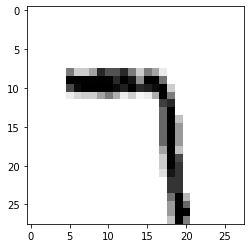

In [36]:
import matplotlib.pyplot as plt

print("This image is in class '9'.")
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

print("This image is in class '1'.")
digit = train_images[3]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

print("This image is in class '7'.")
digit = test_images[5999]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

prediction_digit_1 = test_images[9686]
prediction_digit_2 = test_images[9688]

Images are nothing but a collection of 3 Dimenstional matrx with different pixel values that range between **0-255**. For a grayscale image, there are no color values, so it becomes a 2 dimensional matrix. If it were a colored image, the image would have an additional channel for RGB colors, making it a 3x3 matrix.

They appear something like:

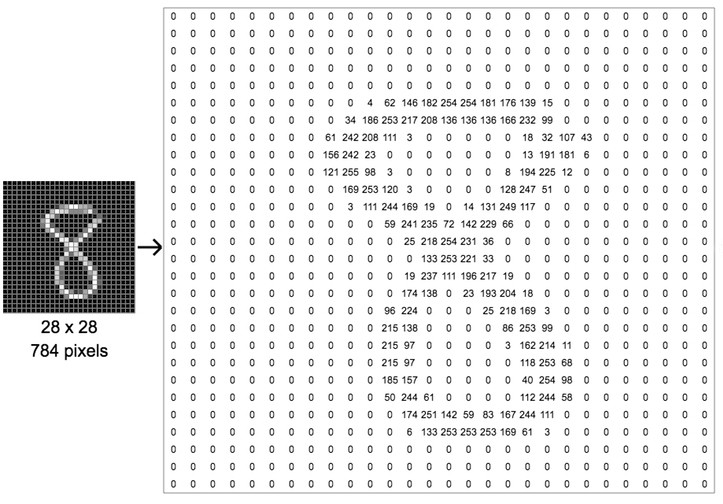

####**Getting the data ready for training.**####

This is easily the most important part of data pre-processing step to develop an efficient machine learning model. Converting the training dataset from a wide range of pixel values from 0-255 to something that falls between 0-1 will make our model converge faster. Hence, we divide the both the training and testing image pixel values by 255.

The reshape function is just used to convert the images into a 1-dimensional array of 28*28 = 784 rather than a 2D array of 28 rows and 28 columns. It is done to input the image to our network as 1D array. 

In [37]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

**Assigning Labels numeric values**

You could ignore the next step but essentially what is does is, it converts the labels (or 'classes') into arrays that the computers understand and can associate the training images with its respective class to "learn" which image is which.

In [38]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

####Time to import the network architecture

We will be using a build-in **Tensorflow** architecture which used Keras as a backend. This architecture was developed by Google and is a nice place to start. I wouldn't worry too much about what each code does for now and observe with how easy it is to get started with.

In [39]:
#import keras
from keras import models, layers

#Here we define our deep neural network
network = models.Sequential()

#The next will be our first input layer
#We will primarily feed our image data in this layer
#We will look at activation functions and optimizers in some other lab. For general purposes, relu is almost always the go to activation function.

network.add(layers.Dense(8, activation = 'relu', input_shape = (28 * 28, )))

#Add a hidden layer
network.add(layers.Dense(16))

#Our output layer layer
network.add(layers.Dense(10, activation = 'softmax'))

In [40]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________


Graphically, our model looks like:

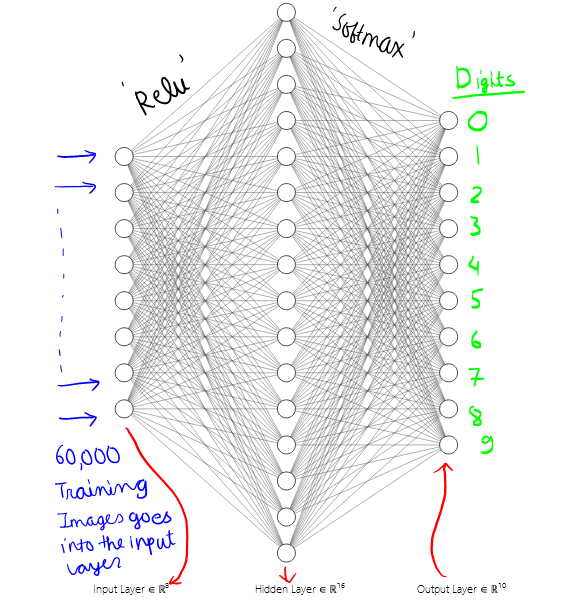

More information on activation functions and optimizers.

[Activation Function](https://keras.io/api/layers/activations/)

[Optimizers](https://keras.io/api/optimizers/)

In [41]:
#In this part of the code, you will define the optimizer you want to use for the loss function
#The 'categorical_crossentropy' for loss and 'accuracy' for metric won't change for classification

network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')

The next step is where the magic happens. This step is basically telling your network to strain the model in 5 iterations(or epochs) and take 128 batches of images for training in every iteration.

In [42]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.1112 - accuracy: 0.6741
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8947
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.9112
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9185
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2865 - accuracy: 0.9226


####What do these results mean?####

Loss represents how badly your model is doing on the training dataset. A gradual decrease in loss is preferable and the accuracy on the training model should increase with gradual increase in every iteration.

Let's see how it does in a completely random dataset not used to train the model i.e., test dataset.

In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Average Test Accuracy: %2.2f percent' %(test_acc*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.9225
Average Test Accuracy: 92.25 percent


Seeing it in action.

Our network is working?


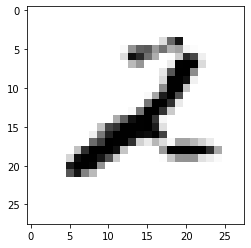

Probability of being 0 is: 0.000003
Probability of being 1 is: 0.000944
Probability of being 2 is: 0.936896
Probability of being 3 is: 0.016652
Probability of being 4 is: 0.000010
Probability of being 5 is: 0.000082
Probability of being 6 is: 0.000080
Probability of being 7 is: 0.000368
Probability of being 8 is: 0.044777
Probability of being 9 is: 0.000188
The digit is the number: 2


In [44]:
print("Our network is working?")
plt.imshow(prediction_digit_1, cmap = plt.cm.binary)
plt.show()

prediction_digit_1 = prediction_digit_1.reshape((1, 28*28))
prediction_digit_1 = prediction_digit_1.astype('float32')/255

pred = network.predict(prediction_digit_1)

for i in range(len(pred[0])):
  print("Probability of being %d is: %f" %(i, pred[0][i]))

max_pred = np.max(pred)
index = np.where(pred == max_pred)

print("The digit is the number: %d" %(index[1]))

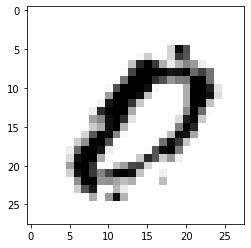

Probability of being 0 is: 0.996993
Probability of being 1 is: 0.000000
Probability of being 2 is: 0.000025
Probability of being 3 is: 0.000009
Probability of being 4 is: 0.000000
Probability of being 5 is: 0.002821
Probability of being 6 is: 0.000052
Probability of being 7 is: 0.000000
Probability of being 8 is: 0.000095
Probability of being 9 is: 0.000006
The digit is the number: 0


In [45]:
plt.imshow(prediction_digit_2, cmap = plt.cm.binary)
plt.show()

prediction_digit_2 = prediction_digit_2.reshape((1, 28*28))
prediction_digit_2 = prediction_digit_2.astype('float32')/255

pred = network.predict(prediction_digit_2)

for i in range(len(pred[0])):
  print("Probability of being %d is: %f" %(i, pred[0][i]))

max_pred = np.max(pred)
index = np.where(pred == max_pred)

print("The digit is the number: %d" %(index[1]))